In [1]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

from SALib.test_functions import Ishigami


In [2]:
# def parabola(x,a,b,c):
#     return a+b*x**2+c*x**3

def TLMtwo(f,R1, R2, Q, delta1, alpha):
   
    omega = 2 * np.pi * np.array(f)
    # R1, R2, Q, delta1, alpha = p[0], p[1], p[2], p[3], p[4]
    delta2=1-delta1
    k12=R2/R1
    wc1=1/(R1*Q)
    wc2=1/(R2*Q)
    S1=np.sqrt((omega*1j)**alpha/wc1)
    S2=np.sqrt((omega*1j)**alpha/wc2)
    C1=1/np.tanh(delta1*S1)
    C2=1/np.tanh(delta2*S2)

    Z=2*(R1)*(C1*C2*S1*k12+S2)/(S1*(C2*S1*k12+C1*S2))

    return np.abs(Z)

In [3]:
problem ={
    'num_vars': 5,
    'names': ['R1','R2', 'Q', 'delta1', 'alpha'],
    'bounds': [[500,2000],[500,2000],[1e-5,1e-3],[0,1],[0.5,1]]
}

In [4]:
# sample
param_values = saltelli.sample(problem, 2**6)

print(param_values)

# evaluate
f = np.logspace(-3, 1, 50)
y = np.array([TLMtwo(f, *params) for params in param_values])

# print(param_values.shape)
# print(y.shape)
# print(y)
# analyse
sobol_indices = [sobol.analyze(problem, Y) for Y in y.T]

print("Sobol Indices")
# print(sobol_indices)

C:\Users\Gaming\AppData\Local\Temp\ipykernel_28460\3584365412.py:2: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2**6)


[[5.35156250e+02 1.09765625e+03 8.22109375e-04 8.35937500e-01
  8.24218750e-01]
 [1.16796875e+03 1.09765625e+03 8.22109375e-04 8.35937500e-01
  8.24218750e-01]
 [5.35156250e+02 1.49609375e+03 8.22109375e-04 8.35937500e-01
  8.24218750e-01]
 ...
 [1.00390625e+03 8.63281250e+02 7.96093750e-05 6.32812500e-01
  7.69531250e-01]
 [1.00390625e+03 8.63281250e+02 7.96093750e-05 4.14062500e-01
  7.38281250e-01]
 [1.00390625e+03 8.63281250e+02 7.96093750e-05 4.14062500e-01
  7.69531250e-01]]
Sobol Indices


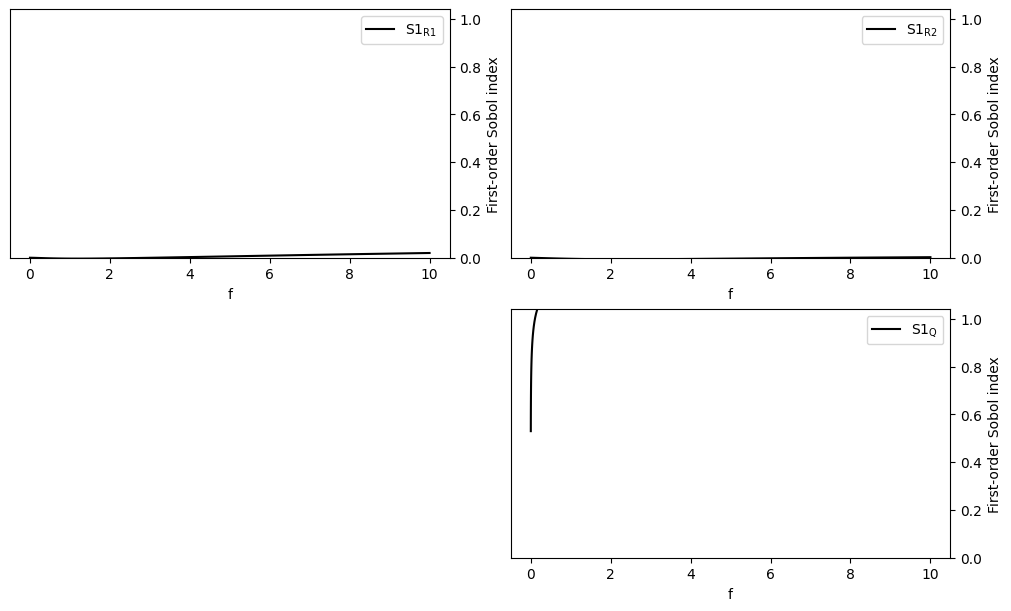

In [5]:
S1s = np.array([s['S1'] for s in sobol_indices])

fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

# ax0 = fig.add_subplot(gs[:, 0])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax0, ax1, ax2]):
    ax.plot(f, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='black')
    ax.set_xlabel("f")
    ax.set_ylabel("First-order Sobol index")

    ax.set_ylim(0, 1.04)

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right')

# ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# # in percent
# prediction_interval = 95

# ax0.fill_between(x,
#                  np.percentile(y, 50 - prediction_interval/2., axis=0),
#                  np.percentile(y, 50 + prediction_interval/2., axis=0),
#                  alpha=0.5, color='black',
#                  label=f"{prediction_interval} % prediction interval")

# ax0.set_xlabel("x")
# ax0.set_ylabel("y")
# ax0.legend(title=r"$y=a+b\cdot x^2$",
#            loc='upper center')._legend_box.align = "left"

plt.show()

In [6]:
# print(sobol_indices)